In [18]:

from src.class_item import Item
import numpy as np
from src.class_packing import Packing

In [19]:
from copy import copy
from matplotlib import pyplot as plt, patches


def draw_segments(item, h):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)
    # plt.savefig('swim_to_sigments ' + str(item.id) + ' with h = ' + str(h) + '.png')
    plt.show()

In [20]:
import math
from src.class_polygon import Polygon

input_file_name = 'shirts.txt'
# input_file_name = 'swim.txt'
# input_file_name = 'trousers.txt'

width= 40
height = 80

# width = 79
# height = 300
# num_rot=4
# num_sort=2
eps=0.0

"""Входные данные типа swim.txt (trousers.txt)"""
# ------------  чтение файла  ------------
path = 'shirts.txt'
# path = 'swim.txt'
# path = 'trousers.txt'
# path = "src\\input\\" + input_file_name
f = open(path, 'r')
line = f.readline()
polygons = []
while line:
    f.readline()  #QUANTITY
    quantity = int(f.readline().split(' ')[0][:-1])
    f.readline()  #NUMBER OF VERTICES
    num_verties = int(f.readline().split(' ')[0][:-1])
    f.readline()  #VERTICES (X,Y)
    polygon = []
    for _ in range(num_verties):
        line = f.readline()
        list_point = (''.join([
            line[i] for i in range(len(line) - 1)
            if not ((line[i] == ' ') and (line[i + 1] == ' '))
        ])).split(' ')
        point = [float(list_point[-2]), float(list_point[-1])]
        polygon.append(copy(point))
    for _ in range(quantity):
        polygons.append(copy(polygon))

    f.readline()  #
    line = f.readline()  #PIECE k
f.close()
# ------------  Упаковка  ------------
packing = Packing(width=width,
                    height=height,
                    drill_radius=0,
                    border_distance=0)

packing.polygons = copy(polygons)
packing.num_items = len(polygons)

packing.items = np.full(packing.num_items, None)
for id in range(packing.num_items):

    rotated_points = copy(polygons[id])
    new_points = Polygon(rotated_points)
    new_points.rotate(3*math.pi/2)
    new_points.move_to_origin()
    points1 = new_points.points_to_list()

    item = Item(id, copy(points1))
    packing.items[id] = copy(item)
    packing.items[id].rotation = 0

# for item in packing.items:
#     print(item.rotation)
for item in packing.items:
    print(item.points)

[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 7.0], [1.0, 0.0], [5.0, 0.0], [7.0, 7.0], [5.0, 8.0], [4.0, 8.0], [3.0, 9.0], [2.0, 8.0]]
[[0.0, 12.0], [0.0, 1.0], [2.0, 0.0], [3.0, 1.0], [5.0, 1.0], [6.0, 2.0], [5.0, 6.0], [6.0, 9.0], [5.0, 12.0], [3.0, 13.0]]
[[0.0, 12.0], [0.0, 1.0], [2.0, 0.0], [3.0, 1.0], [5.0, 1.0], [6.0, 2.0], [5.0, 6.0], [6.0, 9.0], [5

In [21]:
from datetime import datetime
from src.greedy_alg.class_pallets import Pallets

h = 1

# packing = Packing(width=width, height=height, drill_radius=0)

pallets = Pallets([width, height])
pallets.grid_step = h
pallets.add_pallet_lines()

packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

packing.set_squares()

packing.sort_items(num_sort=2)

# for item in packing.items:
#     print(item.rotation)

# for item in packing.items:
#     draw_segments(item, h)

In [22]:
start_time = datetime.now()
packing.segments_bottom_left()
print(datetime.now() - start_time)

0:00:00.408326


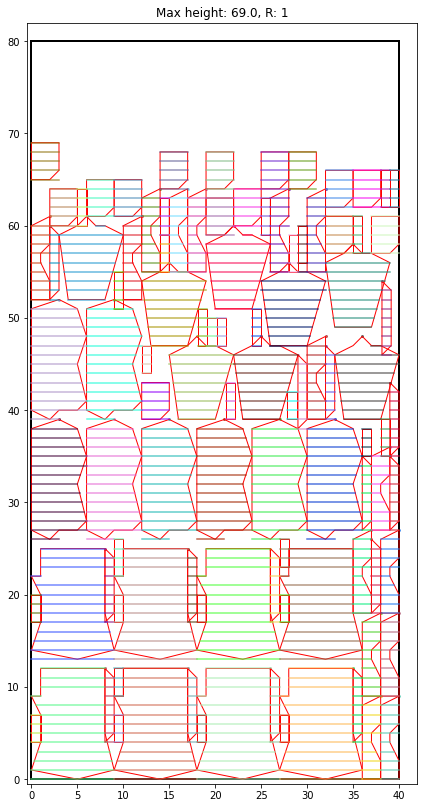

In [23]:
packing.draw_segments_packing()